In [1]:
import mysql.connector
from mysql.connector import errorcode
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
# Connect to the database
try:
  conn = mysql.connector.connect(user='root', password='Drew$kiWi1kins09!',
                              host='127.0.0.1',
                              database='NovaDB')
except mysql.connector.Error as err:
  if err.errno == errorcode.ER_ACCESS_DENIED_ERROR:
    print("Wrong user name or password")
  elif err.errno == errorcode.ER_BAD_DB_ERROR:
    print("Database does not exist")
  else:
    print(err)
else:
  conn.close()

In [3]:
# Sample query
conn = mysql.connector.connect(user='root', password='Drew$kiWi1kins09!', host='127.0.0.1', database='NovaDB')
cursor = conn.cursor()

query = ("SELECT * "
         "FROM Star "
         "WHERE ConstellationID = 'Ori'")

cursor.execute(query)
result = pd.DataFrame(cursor.fetchall(), columns= ["HipparcosID", "HenryDraperID", "HarvardRevisedID", "GlieseID",
        "BayerFlamsteed", "ProperName", "RA", "Dec", "Distance", "Magnitude", "AbsoluteMagnitude", "SpectralType",
        "ColorIndex", "X", "Y", "Z", "RA(radians)", "Dec(radians)", "ConstellationID", "Luminosity", "CompanionID",
        "PrimaryCompanionID", "BaseName", "VariableStarID", "VariableMinMagnitude", "VariableMaxMagnitude"])
#print(result[["HipparcosID", "HenryDraperID", "HarvardRevisedID", "GlieseID",
#        "BayerFlamsteed", "ProperName", "RA", "Dec", "Distance", "Magnitude", "AbsoluteMagnitude", "SpectralType",
#        "ColorIndex", "X", "Y", "Z", "RA(radians)", "Dec(radians)", "ConstellationID", "Luminosity", "CompanionID",
#        "PrimaryCompanionID", "BaseName", "VariableStarID", "VariableMinMagnitude", "VariableMaxMagnitude"]])

#result = pd.DataFrame(cursor.fetchall(), columns= ["ConstellationID", "ConstellationName", "Shape"])
#print(result[["ConstellationID", "ConstellationName"]])

cursor.close()
conn.close()

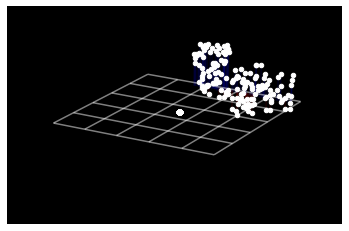

In [10]:
from mpl_toolkits.mplot3d import Axes3D

# Define the 3D figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Read the data from the query as a list
xs = list(pd.to_numeric(result["X"]))
ys = list(pd.to_numeric(result["Y"]))
zs = list(pd.to_numeric(result["Z"]))

# Draw the scatterplot
ax.scatter(xs, ys, zs, c= "w", depthshade= False)

# The axis wont be centered initially, so let's fix that.  Start by getting the max value on each dimension
xlim = max(np.abs(ax.get_xlim()))
ylim = max(np.abs(ax.get_ylim()))
zlim = max(np.abs(ax.get_zlim()))
# Then set the axis on each dimension such that 0 is in the middle of the max value
ax.set_xlim(-xlim, xlim)
ax.set_ylim(-ylim, ylim)
ax.set_zlim(-zlim, zlim)

# Draw a plane at z= 0
xx, yy = np.meshgrid(np.arange(-xlim, xlim, 100), np.arange(-ylim, ylim, 100))
z = xx * 0
ax.plot_wireframe(xx, yy, z, alpha=0.5, rcount= 5, ccount= 5, colors= "w")


# Draw lines from the z=0 plane to the star
for i,j,k in zip(xs, ys, zs):
    if (i != 0) and (j != 0) and (k != 0):
        if k >= 0: ax.plot([i,i],[j,j],[0,k],color = 'b', alpha= .1)
        else: ax.plot([i,i],[j,j],[0,k], color = 'r', alpha= .1)

ax.set_facecolor('black')
ax.grid(False)
ax.set_axis_off()
plt.show()